**This notebook showcases data cleaning and predictions performed on 1,000 molecules compounds represented by SMILES to conduct a Model Bias Evaluation in the Ersilia Model Hub.**

**The dataset used is "reference_library.csv" shared by the mentor for the contribution phase of outreachy Internship 2024.**

# Data Pre-Processing

In [2]:
#Installing necessary Libraries and specifying path to relevant folders
!pip install rdkit
!pip install standardiser
# In this codeblock I will import the necessary packages and specify the paths to relevant folders
from rdkit import RDLogger
import logging
from os import path, remove
from rdkit import Chem
from rdkit.Chem import AllChem
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Disable warning messages
logging.getLogger("standardiser.standardise").setLevel(logging.ERROR)
RDLogger.DisableLog('rdApp.error')
RDLogger.DisableLog('rdApp.warning')

sys.path.append('../src')
DATAPATH = "../data"
FIGUREPATH = "../figures/"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.4/698.4 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for standardiser: filename=standardiser-0.1.9-py3-none-any.whl size=720101 sha256=1d18f7446aeaca68c2e95c087a57ebbadc8c4f4d2a2f2b8c5a7648b98863f17f
  Stored in directory: /root/.cache/pip/wheels/eb/62/4b/6044430bf5a732d53bd0d1aa165c928954d9f87cd92529f00f
Successfully built standardiser


In [3]:
# Loading the data from the /content folder to a Pandas dataframe and inspect the columns
data = pd.read_csv("/content/reference_library.csv")

In [4]:
data.head()

,smiles
0,CCCCNC(=S)N/N=C/C1=C(C)C=CS1
1,CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1
2,O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl
3,O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...
4,CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...


In [5]:
## Mount google drive
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
# Cloning the Git repository
!git clone https://github.com/KiitanTheAnalyst/Ersilia---Olaitan-Suru

Cloning into 'Ersilia---Olaitan-Suru'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 121 (delta 51), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (121/121), 261.44 KiB | 4.22 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [7]:
#converting the molecules to standard SMILES by using the function standardise_smiles from /src
import sys
sys.path.append('/content/Ersilia---Olaitan-Suru/src')

from smiles_processing import standardise_smiles

smiles_list = data['smiles'].tolist()
data['standardised_smiles'] = standardise_smiles(smiles_list)

In [8]:
# Checking for Nan column
data.isna().sum()

smiles                 0
standardised_smiles    3
dtype: int64

In [9]:
# Dropping Nan column
data.dropna(subset=['standardised_smiles'], inplace=True)

In [10]:
# Inspect the DataFrame
data.head()

,smiles,standardised_smiles
0,CCCCNC(=S)N/N=C/C1=C(C)C=CS1,CCCCNC(=S)N/N=C/c1sccc1C
1,CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1,Cn1c(SCc2nc(-c3cccs3)no2)nnc1C1CCCCC1
2,O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl,O=C(O)CC(NC(=O)c1cnccn1)c1ccccc1Cl
3,O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...,O=S(=O)(c1ccccc1)N1CCN(c2noc3cccc(Cl)c23)CC1
4,CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...,CCC[C@@H](C)N(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1


In [11]:
# checking the data types of columns in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   smiles               997 non-null    object
 1   standardised_smiles  997 non-null    object
dtypes: object(2)
memory usage: 23.4+ KB


In [12]:
# Getting the Inchikey representation of the molecules using the RDKIT package
from smiles_processing import smiles_to_inchikey

data['inchi_key'] = data['standardised_smiles'].apply(smiles_to_inchikey)
data = data.dropna(subset=['inchi_key'])

In [13]:
data.head(5)

,smiles,standardised_smiles,inchi_key
0,CCCCNC(=S)N/N=C/C1=C(C)C=CS1,CCCCNC(=S)N/N=C/c1sccc1C,SUTWUYBMBWPLMW-MDWZMJQESA-N
1,CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1,Cn1c(SCc2nc(-c3cccs3)no2)nnc1C1CCCCC1,RIYHJWOTNJXDLV-UHFFFAOYSA-N
2,O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl,O=C(O)CC(NC(=O)c1cnccn1)c1ccccc1Cl,OGNBARHGQVMGGX-UHFFFAOYSA-N
3,O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...,O=S(=O)(c1ccccc1)N1CCN(c2noc3cccc(Cl)c23)CC1,WQEXDIRUOYNDCM-UHFFFAOYSA-N
4,CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...,CCC[C@@H](C)N(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1,YEGVLLQDOGYWDQ-OAHLLOKOSA-N


In [14]:
# Saving the data as a .csv file containing only the standardised smiles and the inchikey as columns.
output_file = "/content/drive/MyDrive/Ersilia/stnd_smile_inchikey"

if path.exists(output_file):
    remove(output_file)

col = ['standardised_smiles', 'inchi_key']
updated_data = pd.DataFrame(data, columns=col)
updated_data.to_csv("/content/drive/MyDrive/Ersilia/stnd_smile_inchikey.csv", index = False)

In [15]:
#Inspect the new dataframe
df = pd.read_csv("/content/drive/MyDrive/Ersilia/stnd_smile_inchikey.csv")
df.head(5)

,standardised_smiles,inchi_key
0,CCCCNC(=S)N/N=C/c1sccc1C,SUTWUYBMBWPLMW-MDWZMJQESA-N
1,Cn1c(SCc2nc(-c3cccs3)no2)nnc1C1CCCCC1,RIYHJWOTNJXDLV-UHFFFAOYSA-N
2,O=C(O)CC(NC(=O)c1cnccn1)c1ccccc1Cl,OGNBARHGQVMGGX-UHFFFAOYSA-N
3,O=S(=O)(c1ccccc1)N1CCN(c2noc3cccc(Cl)c23)CC1,WQEXDIRUOYNDCM-UHFFFAOYSA-N
4,CCC[C@@H](C)N(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1,YEGVLLQDOGYWDQ-OAHLLOKOSA-N


# Model Bias Evaluation

In [16]:
#installing miniconda and Ersilia
%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH= "$PYTHONPATH:/usr/local/lib/python3.7/site-packages"
%env PIP_ROOT_USER_ACTION=ignore

In [17]:
!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

--2024-03-21 11:34:31--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104996770 (100M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’

Miniconda3-py37_4.1 100%[===================>] 100.13M   185MB/s    in 0.5s    

2024-03-21 11:34:32 (185 MB/s) - ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’ saved [104996770/104996770]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py37h06a4308_2
    - cffi==1.15.0=py37hd667e15_1
    

In [18]:
!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
!python -m pip install pandas
!rm $MINICONDA_INSTALLER_SC

import sys

_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

  Cloning https://github.com/ersilia-os/ersilia.git to /tmp/pip-req-build-v7o1ffn8
  Running command git clone -q https://github.com/ersilia-os/ersilia.git /tmp/pip-req-build-v7o1ffn8
  Resolved https://github.com/ersilia-os/ersilia.git to commit ede7206c99bdc7315c71874e2704bb76a3110aaa
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 4.3 MB 11.5 MB/s 
     |████████████████████████████████| 78 kB 6.5 MB/s 
     |████████████████████████████████| 421 kB 48.8 MB/s 
     |████████████████████████████████| 9.9 MB 40.4 MB/s 
     |████████████████████████████████| 148 kB 32.9 MB/s 
     |████████████████████████████████| 139 kB 43.6 MB/s 
     |████████████████████████████████| 670 kB 64.3 MB/s 
     |████████████████████████████████| 58 kB 6.5 MB/s 
     |████████████████████████████████| 97 kB 7.8 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████

In [19]:
# Enter the model name
# This is just an example, make sure to adapt it to your specific model

model_name = "eos6oli"  # @param {type:"string"}

In [20]:
# @title 📥 Fetch the model
import time

begin = time.time()
!ersilia fetch $model_name
end = time.time()

print("Time taken:", round((end - begin), 2), "seconds")

⬇️  Fetching model eos6oli: soltrannet-aqueous-solubility
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
  Running command git clone -q https://github.com/ersilia-os/bentoml-ersilia.git /tmp/pip-req-build-mlzabpzp
Solving environment: \ failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: / - \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/envs/eosbase-bentoml-0.11.0-py37

  added / updated specs:
    - python=3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-5.1          |            1_gnu          21 KB
    ca-certificates-2024.3.11  |      

In [21]:
# @title ⚙️ Serve the model

# returns available APIs (calculate or predict)

!ersilia serve $model_name

sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:52593
   PID: 4312
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info


In [22]:
# # Running the predictions

# mdl.serve()
# start = time.time()
# st_smiles = list(data['standardise_smiles'])
# output = mdl.run(st_smiles, output = "pandas")
# end = time.time()
# print("Predictions calculated. Time taken:", end - start)
# mdl.close()

 #@title ⚡ Run predictions
api = "calculate"  # @param {type:"string"}

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model_name)
begin = time.time()
std_smiles = list(data['standardised_smiles'])
output = model.api(input=std_smiles, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2), "seconds")
model.close()

Successful 👍! Time taken: 60.02 seconds


In [23]:
#printing the predictions as solubility
output

,key,input,solubility
0,SUTWUYBMBWPLMW-MDWZMJQESA-N,CCCCNC(=S)N/N=C/c1sccc1C,-3.454
1,RIYHJWOTNJXDLV-UHFFFAOYSA-N,Cn1c(SCc2nc(-c3cccs3)no2)nnc1C1CCCCC1,-4.502
2,OGNBARHGQVMGGX-UHFFFAOYSA-N,O=C(O)CC(NC(=O)c1cnccn1)c1ccccc1Cl,-2.900
3,WQEXDIRUOYNDCM-UHFFFAOYSA-N,O=S(=O)(c1ccccc1)N1CCN(c2noc3cccc(Cl)c23)CC1,-4.777
4,YEGVLLQDOGYWDQ-OAHLLOKOSA-N,CCC[C@@H](C)N(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1,-4.473
...,...,...,...
992,RGKVPYQYBUAAEH-UHFFFAOYSA-N,CCCn1c(-c2cnc(Nc3ccc(C)nc3)c(Cl)c2)nc2cccc(Cl)c21,-7.525
993,VTRFEMUYHTXFEQ-UHFFFAOYSA-N,CN(Cc1cccc2ccccc12)Cn1nc(-c2ccncc2)oc1=O,-4.242
994,QDFOYTHIYBSDPW-RGAOVNQFSA-N,O=C(N[C@@H](CSCc1ccccc1)C(=O)Nc1ccc(C2S/C(=N\c...,-8.070
995,YZQZXLROYFNFQE-QTGUNEKASA-N,CN1CC[C@]23CCCC[C@H]2[C@H]1Cc1ccc(Oc2ccccc2F)cc13,-5.465


In [34]:
#Converting the output into a pandas dataframe
output = pd.DataFrame(output, columns=['key', 'input', 'solubility'])

# Distribution of Predicted Values

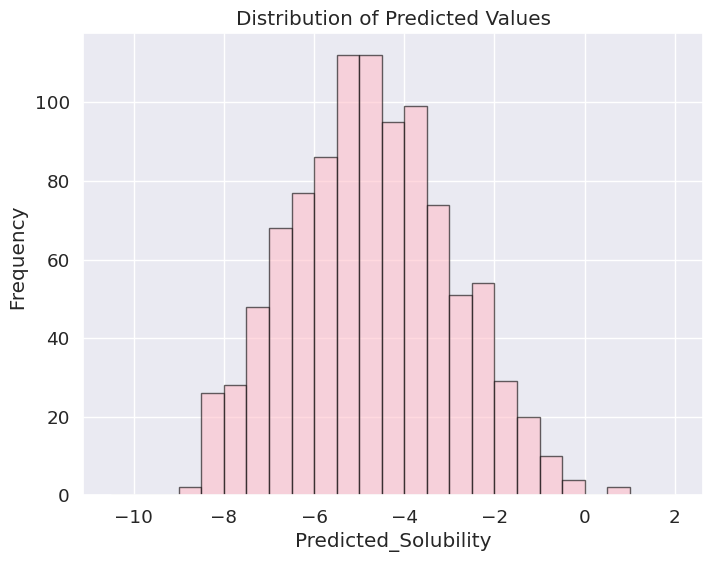

In [35]:
# Plots to observe the distribution of predicted values
import matplotlib.pyplot as plt
bins=list(np.arange(-10.5,2.5,.5))

plt.figure(figsize=(8, 6))
plt.hist(output['solubility'], bins=bins, color='pink', edgecolor='black', alpha=0.6)
plt.ylabel('  Frequency')
plt.xlabel('Predicted_Solubility')
plt.title('Distribution of Predicted Values')

figure_path = '/content/Ersilia---Olaitan-Suru/Figures/Histogram_Plot.png'
plt.savefig(figure_path)



**This plot shows the distribution of solubility values. It gives an idea of the frequency of solubility values in the dataset. In this case, it appears that most compounds have solubility values concentrated around -5.**

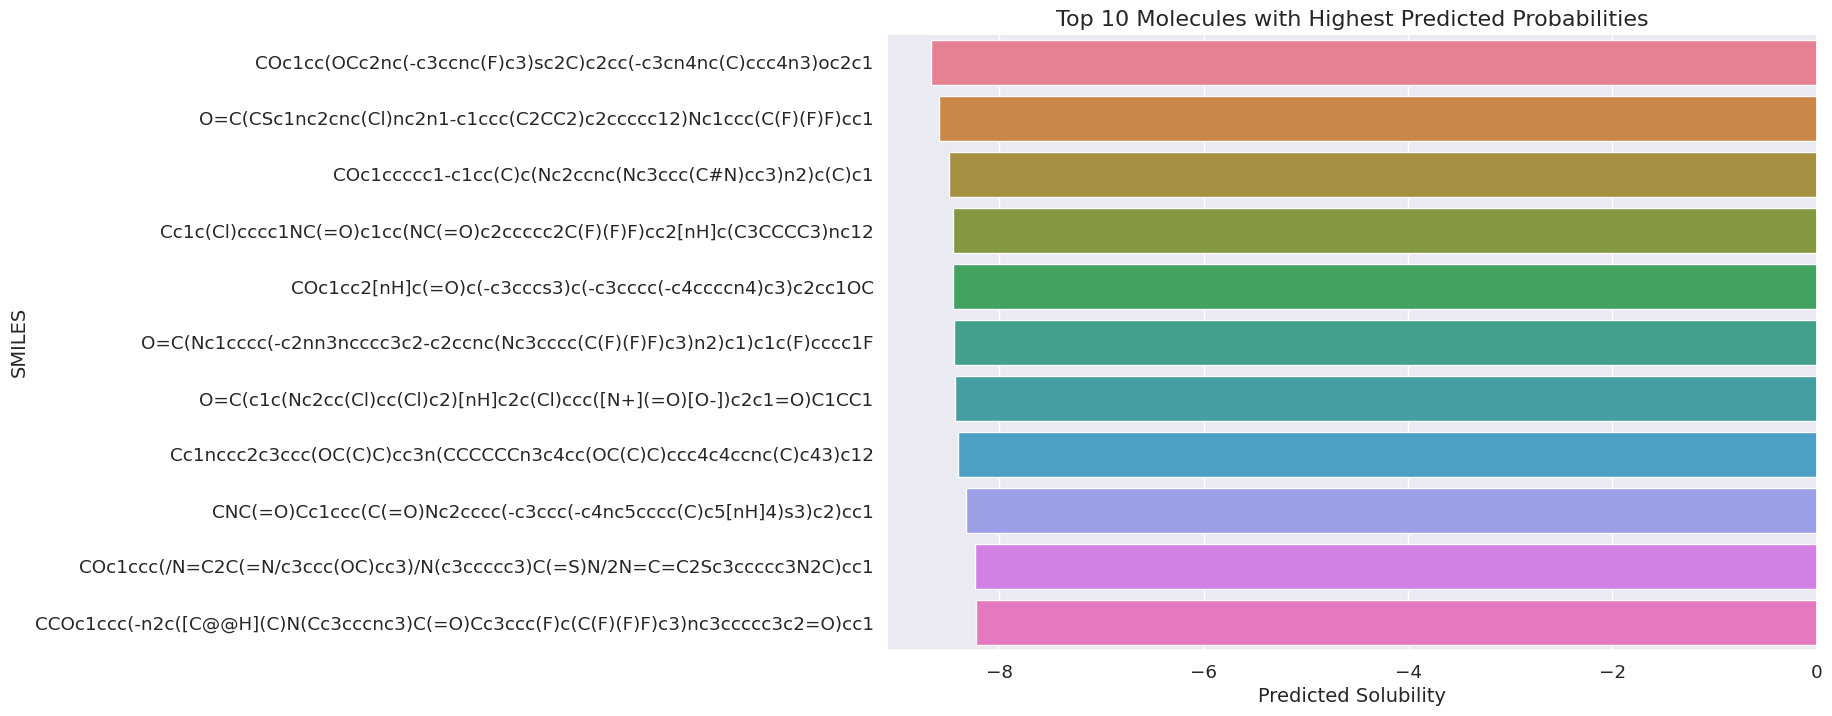

<Figure size 640x480 with 0 Axes>

In [36]:
import seaborn as sns

# Create a bar plot
top_10_predictions = output.sort_values(by='solubility', ascending=True).head(11)
color_palette = sns.color_palette("husl", len(top_10_predictions))
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.2)
sns.barplot(x='solubility', y='input', hue='input', data=top_10_predictions, palette=color_palette, dodge=False)
plt.xlabel('Predicted Solubility', fontsize=14)
plt.ylabel('SMILES', fontsize=14)
plt.title('Top 10 Molecules with Highest Predicted Probabilities', fontsize=16)
plt.grid(True, axis='x')
plt.show()

figure_path = '/content/Ersilia---Olaitan-Suru/Figures/Barplot.png'
plt.savefig(figure_path)

In [37]:
from rdkit import Chem
from rdkit.Chem import DataStructs, AllChem
import numpy as np
from sklearn.decomposition import PCA


# Morgan Fingerprint funtion
def generate_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    finger_prints = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
    array = np.zeros((1,), dtype=np.int8)
    Chem.DataStructs.ConvertToNumpyArray(finger_prints, array)
    return array

# Threshold set for hERG inhibitors
hERG_blockers_threshold = 0.5

output['Fingerprint'] = output['input'].apply(generate_fingerprint)

fingerprints = np.vstack(output['Fingerprint'])
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(fingerprints)

output.head()

,key,input,solubility,Fingerprint
0,SUTWUYBMBWPLMW-MDWZMJQESA-N,CCCCNC(=S)N/N=C/c1sccc1C,-3.454,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
1,RIYHJWOTNJXDLV-UHFFFAOYSA-N,Cn1c(SCc2nc(-c3cccs3)no2)nnc1C1CCCCC1,-4.502,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
2,OGNBARHGQVMGGX-UHFFFAOYSA-N,O=C(O)CC(NC(=O)c1cnccn1)c1ccccc1Cl,-2.900,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,WQEXDIRUOYNDCM-UHFFFAOYSA-N,O=S(=O)(c1ccccc1)N1CCN(c2noc3cccc(Cl)c23)CC1,-4.777,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,YEGVLLQDOGYWDQ-OAHLLOKOSA-N,CCC[C@@H](C)N(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1,-4.473,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


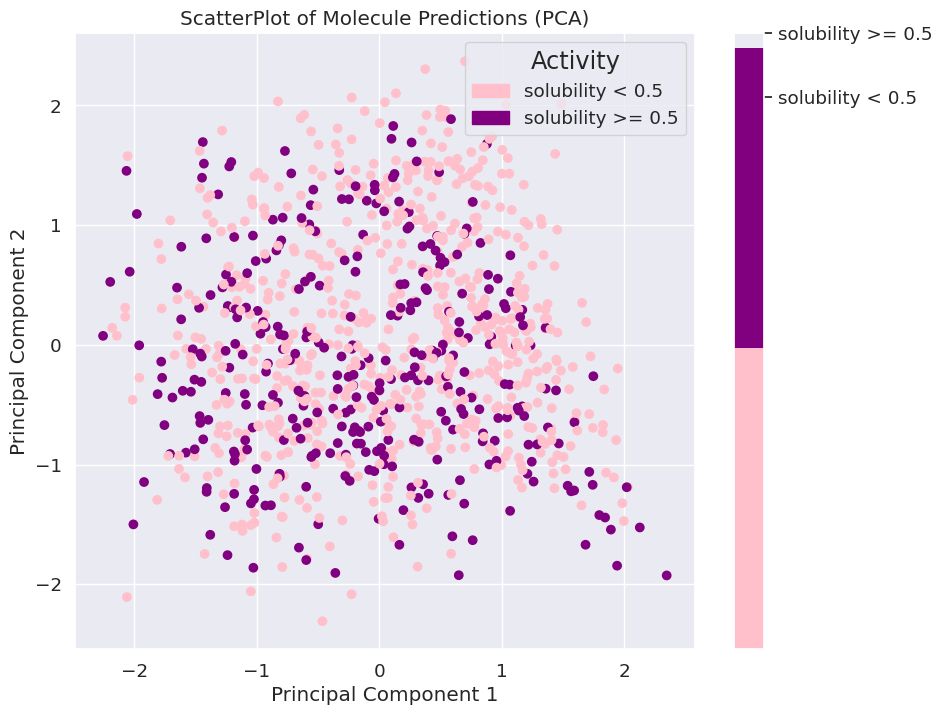

<Figure size 640x480 with 0 Axes>

In [42]:
from sklearn.decomposition import PCA
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Plot scatterplot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=output['solubility'], cmap=mcolors.ListedColormap(legend_colors))
plt.title('ScatterPlot of Molecule Predictions (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

legend_labels = ['solubility < 0.5', 'solubility >= 0.5']
legend_colors = ['pink', 'purple']
legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=legend_patches, loc='upper right', title='Activity', title_fontsize='large')

# Set colorbar ticks and labels
cbar = plt.colorbar(scatter)
cbar.set_ticks([0, 1])
cbar.set_ticklabels(legend_labels)
plt.show()

figure_path = '/content/Ersilia---Olaitan-Suru/Figures/Scatterplot.png'
plt.savefig(figure_path)

**The scatterplot shows the distribution of molecules in the reduced two-dimensional space. Points that are clustered together indicate molecules with similar fingerprints. The clusters on this plot shows that molecules with similar fingerprints have similar solubility value.**

**The distribution of colors around this plot indicates the pink color as regions with prediction probability less than 0.5 which indicates lower solubilty, and purple color as areas of high solubility with prediction probability equals or greater than 0.5. From the plot, quite a number of molecules displays low solubility.**